In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
import tensorflow as tf
import importlib
import matplotlib.pyplot as plt
import os
import glob
import skimage
from skimage import measure
from skimage import filters
from skimage.morphology import remove_small_objects
from skimage.filters import threshold_otsu, gaussian
from skimage.exposure import rescale_intensity
from tifffile import imread
import scipy
from scipy import ndimage
from Normalize import Path,normalizeMinMax, fill_label_holes, save_tiff_imagej_compatible
from skimage.measure import label, regionprops


/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
basedir = '/Users/aimachine/Documents/DeepLearningTalk/SemanticSeg/TestConnected/'
targetdir = '/Users/aimachine/Documents/DeepLearningTalk/SemanticSeg/Results/'

In [3]:
Path = os.path.join(basedir, '*.tif')
X = []
Names = []
filesRaw = glob.glob(Path)
maxtime = 0
axes = 'TYX'
for fname in filesRaw:
      x = imread(fname)
      min = np.amin(x)
      max = np.amax(x)
      x = normalizeMinMax(x, min, max)  
      X.append(x)
    
     
      Names.append(fname)
      if X[0].shape[0] > maxtime:
        maxtime = X[0].shape[0]
X.sort
Names.sort


ReshapeX = []
for i in range(len(X)):
    y = np.zeros((maxtime, X[0].shape[1], X[0].shape[2]))
    image = X[i]
    
    y[:X[i].shape[0],:,:] = image[:,:,:]
    ReshapeX.append(y)
    
ReshapeX.sort

print('Total number of input images = ', len(X))
print('Image size = ', X[0].shape)
print('Time dim = ', maxtime)

timerange = maxtime

    
    

Total number of input images =  1
Image size =  (2, 2048, 2048)
Time dim =  2


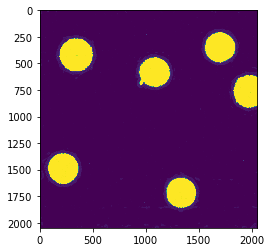

In [4]:
image = ReshapeX[0]
plt.imshow(image[0,:,:])



In [5]:
RemoveLabel = None
RemoveSize = 40

In [6]:
def RemoveBad(img):
    cleanimage = img
    for j in range(timerange):
      smallimg = img[j,:,:]
      if RemoveLabel is not None:
         pureimg = smallimg==RemoveLabel
        
      cleanimage[j,:,:] = pureimg;  
     
    return cleanimage

In [7]:
def GetLabel(img):
    labels = img.copy();
    
    for j in range(timerange):
      smallimg = img[j,:,:]
      
      
      binary  =  smallimg > 0
      
      thresh = threshold_otsu(smallimg) 
      image_no_hole = fill_label_holes(smallimg > thresh)
      label_image = label(image_no_hole)
      plt.imshow(label_image)
      nonormimg = fill_label_holes(label_image[:,:] )
      nonormimg = remove_small_objects(label_image, min_size=RemoveSize, connectivity=16, in_place=False)
       
      min = np.amin(nonormimg)
      max = np.amax(nonormimg)
      nonormimg = normalizeMinMax(nonormimg, min, max) 
        
      labels [j,:,:] = nonormimg
    return labels 

/Users/aimachine/PyImage/utils/Normalize.py:48: UserWarning: Converting data type from 'float64' to ImageJ-compatible 'float32'.
  warnings.warn("Converting data type from '%s' to ImageJ-compatible '%s'." % (t, np.dtype(t_new)))
/Users/aimachine/PyImage/utils/Normalize.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[slices]


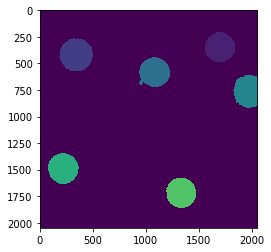

In [8]:

for i in range(0, len(ReshapeX)):
  

  cleanimage = GetLabel(ReshapeX[i])
  save_tiff_imagej_compatible((targetdir + "InstanceSeg" +os.path.basename(Names[i])) , cleanimage, axes)  


 